In [1]:
# l committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in 
# Data, all'indirizzo 
# https://github.com/owid/covid-19-data/tree/master/public/data
# alla voce " Download ourcomplete COVID-19 dataset"scaricare il dataset nel formato che si preferisce.
import pandas as pd
import numpy as np

file_path = r'G:\EPICODE\Appunti\File Python\11.W4D5 PROVA FINALE\owid-covid-data.csv'

db = pd.read_csv(file_path,encoding='utf-8')

print(db)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [2]:
# Si richiede di verificare le dimensioni del dataset e i relativi metadati
print("Dimensioni del dataset:")
print(db.shape)

Dimensioni del dataset:
(429435, 67)


In [3]:
print("Metadati del dataset:")
print(db.info())

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         4093

In [4]:
print("Nomi delle colonne:")
print(db.columns.tolist())

Nomi delle colonne:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_p

In [5]:
print("Anteprima del dataset (prime 5 righe):")
print(db.head())

Anteprima del dataset (prime 5 righe):
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_

In [6]:
# 2. Si chiede di trovare, per ogni continente:
# a. il numero di casi fin dall'inizio della pandemia

# Rimuovere righe con continenti mancanti
db_cleaned = db.dropna(subset=['continent'])

# Raggruppare per continente e calcolare i casi totali
total_continets = db_cleaned.groupby('continent')['new_cases'].sum()

print("Numero totale di casi per continente dall'inizio della pandemia:")
print(total_continets)

Numero totale di casi per continente dall'inizio della pandemia:
continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64


In [7]:
# b. la percentuale rispetto al totale mondiale del numero di casi

#otteniamo i totali casi sommando i vari continenti 
total_cases = total_continets.sum()

# per ogni continente calcolliamo la  percentuale sul totale dei casi 
for continent, cases in total_continets.items():
    percentuale = cases / total_cases * 100
    print(f"{continent}: {cases} ({percentuale:.2f}%)")


Africa: 13146831.0 (1.69%)
Asia: 301564180.0 (38.86%)
Europe: 252916868.0 (32.60%)
North America: 124492698.0 (16.04%)
Oceania: 15003468.0 (1.93%)
South America: 68811012.0 (8.87%)


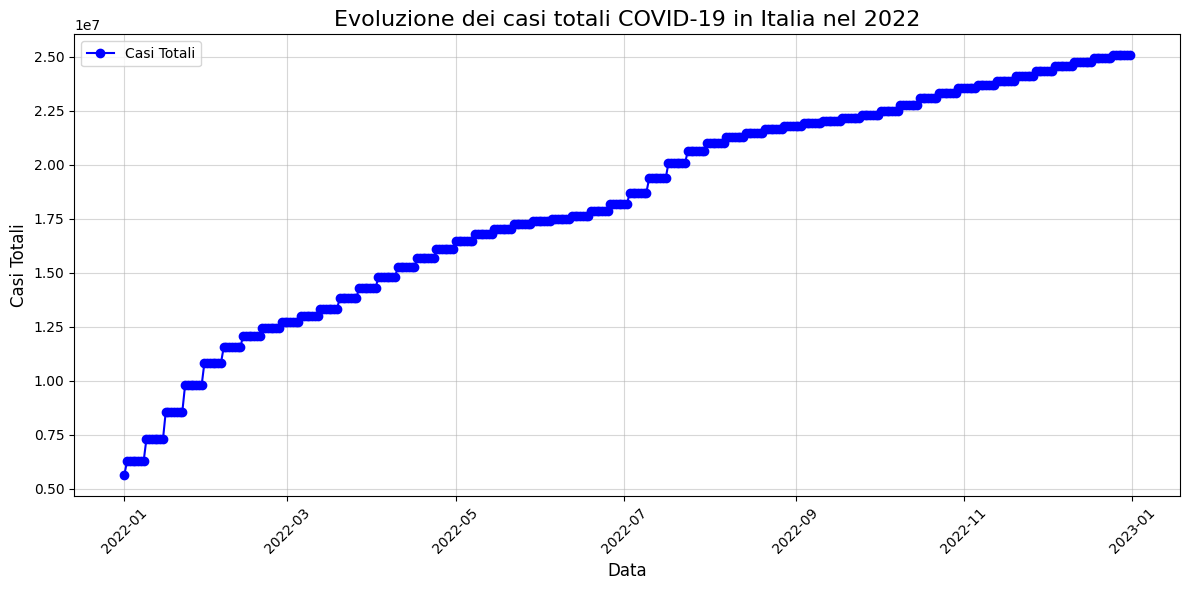

In [8]:
# 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
import matplotlib.pyplot as plt


# Convertire la colonna 'date' in formato datetime
db['date'] = pd.to_datetime(db['date'])
# Filtro i dati relativi all'Italia nel 2022
italy_2022 = db[(db['location'] == 'Italy') & 
                     (db['date'] >= '2022-01-01') & 
                     (db['date'] <= '2022-12-31')]

# Creare il grafico dell'evoluzione dei casi totali
plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], marker='o', label='Casi Totali', color='blue')
plt.title('Evoluzione dei casi totali COVID-19 in Italia nel 2022', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Casi Totali', fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


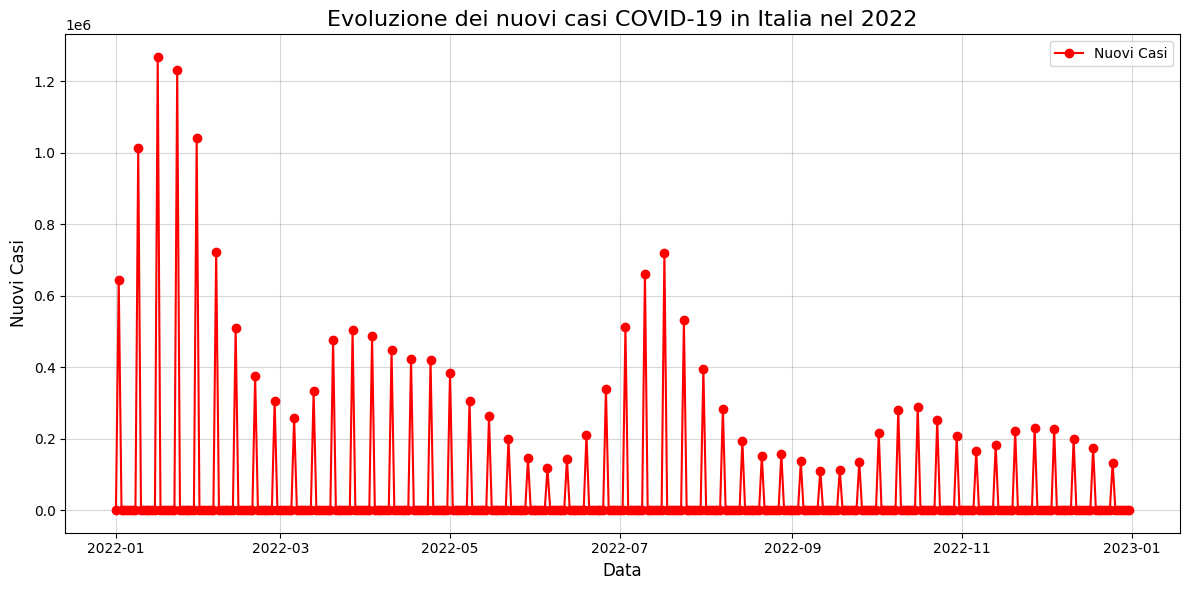

In [9]:
# b. il numero di nuovi casi rispetto alla data
#   k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

# Rimuovere i dati senza misurazioni per 'new_cases'
italy_2022 = italy_2022.dropna(subset=['new_cases'])

# Creare il grafico del numero di nuovi casi
plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], marker='o', color='red', label='Nuovi Casi')
plt.title('Evoluzione dei nuovi casi COVID-19 in Italia nel 2022', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi Casi', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

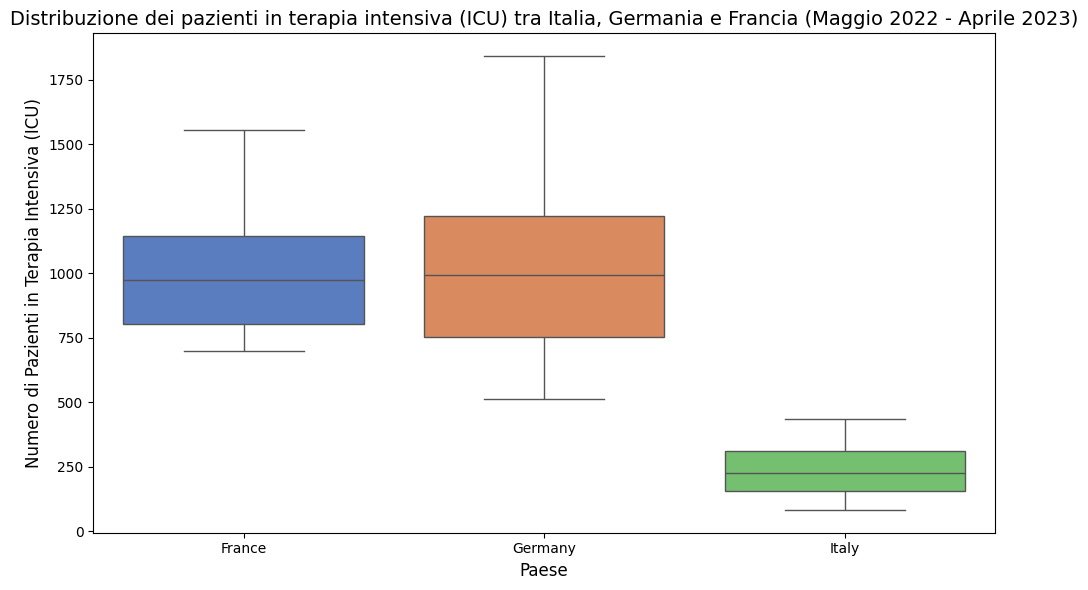

In [10]:
# 4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia
# intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
import seaborn as sns
#stati da prendere in considerazione
countries =['Italy', 'Germany', 'France']
# Filtrare i dati per Italia, Germania e Francia dal 1 maggio 2022 al 30 aprile 2023

filtered_bycountries = db[(db['location'].isin(countries)) &
                          (db['date']>='2022-05-01')&
                          (db['date']<='2023-04-30')]
# Rimuovere i dati senza misurazioni per 'icu_patients'
filtered_data = filtered_bycountries.dropna(subset=['icu_patients'])

# Creare il boxplot con Seaborn e il parametro 'hue' per i paesi
plt.figure(figsize=(10, 6))
sns.boxplot(x="location", y="icu_patients", hue="location", data=filtered_data, palette="muted")

# Titolo e etichette
plt.title('Distribuzione dei pazienti in terapia intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)', fontsize=14)
plt.xlabel('Paese', fontsize=12)
plt.ylabel('Numero di Pazienti in Terapia Intensiva (ICU)', fontsize=12)

# Mostrare il grafico
plt.tight_layout()
plt.show()

# a. scrivere un breve commento a riguardo

# Francia: Il boxplot per la Francia mostra una distribuzione relativamente ampia, 
# con la mediana intorno a 1000 pazienti. La variabilità dei casi è piuttosto alta, 
# come indicato dalla lunghezza delle "whiskers" (le linee orizzontali che si estendono oltre i quartili), 
# che suggerisce una significativa differenza nel numero di pazienti in terapia intensiva tra le settimane.

# Germania: Per la Germania, la distribuzione è simile a quella della Francia, con una mediana vicina a 1000 pazienti.
# La variabilità sembra essere un po' più contenuta rispetto alla Francia, ma comunque significativa.

# Italia: Il boxplot dell'Italia mostra una distribuzione molto più concentrata, con la mediana intorno a 500 pazienti.
# La variabilità è ridotta, suggerendo che in Italia ci sono meno fluttuazioni nel numero di pazienti in terapia intensiva durante il periodo 2022 - 2023.





In [11]:
# 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
# a. mostrare la somma dei pazienti ospitalizzati per ognuna
countries2 =['Italy', 'Germany', 'France','Spain']
filtered_data_2023 = db[(db['location'].isin(countries2)) & 
                        (db['date'] >= '2023-01-01') & 
                        (db['date'] <= '2023-12-31')]

cases_by_country = filtered_data_2023.groupby('location')['hosp_patients'].sum()
# controlliamo quanti valori nulli abbiamo nella colonna hosp_patients
null_counts = filtered_data_2023.groupby('location')['hosp_patients'].apply(lambda x: x.isna().sum())

print("\nNumero di valori nulli (NaN) in 'hosp_patients' per ogni nazione nel 2023:")
print(null_counts)

# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno




Numero di valori nulli (NaN) in 'hosp_patients' per ogni nazione nel 2023:
location
France     275
Germany    365
Italy        0
Spain      203
Name: hosp_patients, dtype: int64


In [12]:
# Germania:
# - Non ci sono dati disponibili per i pazienti ospedalizzati. Non è possibile gestire i valori nulli tramite sostituzione, poiché l'assenza è completa (100% di valori mancanti). La Germania deve essere esclusa dall'analisi.
# Francia:
# - È possibile sostituire i valori nulli con una stima (ad esempio, la media o la mediana dei giorni disponibili), ma questa operazione potrebbe introdurre errori significativi, poiché mancano molti dati (275 giorni su 365).
# Un'alternativa è limitare l'analisi ai giorni per cui sono disponibili dati. Questo ridurrebbe la rappresentatività annuale, ma eviterebbe l'introduzione di dati stimati potenzialmente imprecisi.
# Italia:
# - Non ci sono problemi con i dati, quindi possiamo usarli direttamente.
# Spagna: abbiamo soltanto 163 giorni su 365 come per la francia potremmo procedere per utilizzare una media o mediana dei giorni presenti ma potrebbe indurre in errori.
# conotrolliamo anche per la spagna il 2022

In [13]:

# Escludiamo la Germania dall'analisi, poiché non ci sono dati disponibili. 
# Fracia siccome mancano 90 giorni su 365 una media o una media di questi giorni potrebbe rendere potenzialmente i nostri dati molto imprecisi
# mancando molti giorni dell-anno. 
# controllo quanti dati nan abbiamo nel 2022 per la francia e se abbiamo per caso dei rilievi anche per la germania cosi da poter calcolare una media da poter utiliazzare per il 2023

filtered_data_2022 = db[(db['location'].isin(countries2)) & 
                      (db['date'] >= '2022-01-01') & 
                      (db['date'] <= '2022-12-31')]
#
null_counts2022 = filtered_data_2022.groupby('location')['hosp_patients'].apply(lambda x: x.isna().sum())
print("\nNumero di valori nulli (NaN) in 'hosp_patients' per ogni nazione nel 2022:")
print(null_counts2022)



Numero di valori nulli (NaN) in 'hosp_patients' per ogni nazione nel 2022:
location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64


In [14]:
# siccome la germania non ha dati nemmeno per il 2022  andiamo ad escluderla da questa analisi  mentre per la 
# francia consideriamo la media del 2022 dopo aver controllato la distribuzione dei dati nel 2022
# spagna consideriamo la media del 2022 dopo aver controllato la distribuzione dei dati nel 2022

filter_france_2022 = filtered_data_2022['location']=='France'
print(filtered_data_2022[filter_france_2022]['hosp_patients'].describe())

count      365.000000
mean     20290.235616
std       4935.617047
min      12857.000000
25%      16638.000000
50%      19935.000000
75%      23327.000000
max      33447.000000
Name: hosp_patients, dtype: float64


In [15]:
filter_spain_2022 = filtered_data_2022['location']=='Spain'
print(filtered_data_2022[filter_spain_2022]['hosp_patients'].describe())

count      365.000000
mean      6129.761644
std       3783.885321
min       1380.000000
25%       3521.000000
50%       4570.000000
75%       7456.000000
max      17213.000000
Name: hosp_patients, dtype: float64


In [16]:
# possiamo vedere che la medie e la mediana sono molto simili e che il dataset e ben distribuito 
# controllo anche la medie dei casi in italia nel 2022 e nel 2023 per aver un idea della tendenza prima di utilizzare la media dei casi in francia del 2022 come valore del 2023

filter_italy_2022 = filtered_data_2022['location']=='Italy'
print(filtered_data_2022[filter_italy_2022]['hosp_patients'].describe())



count      365.000000
mean      9415.043836
std       4451.501931
min       3419.000000
25%       6598.000000
50%       8801.000000
75%      10549.000000
max      21728.000000
Name: hosp_patients, dtype: float64


In [17]:
filter_italy_2023 = filtered_data_2023['location']=='Italy'
print(filtered_data_2023[filter_italy_2023]['hosp_patients'].describe())

count     365.000000
mean     3219.923288
std      1943.855115
min       719.000000
25%      1716.000000
50%      2937.000000
75%      3747.000000
max      8409.000000
Name: hosp_patients, dtype: float64


In [18]:
# prendendo in cosiderazione che nel 2022 l-italia ha avuto una media di casi pari a 9415 e nel 2023 3219 sarebbe corretto stimare che anche in francia e spagna ci sia stata una variazione simile 
# percio andremo a calcoare la variazione avvenuta in italia e la applicheremo al varole medie del 2022 della francia e spagna per poi utilizarlo come valore del 2023

# media francia 2022
avg_francia_2022 = filtered_data_2022[filter_france_2022]['hosp_patients'].mean()
avg_spain_2022 = filtered_data_2022[filter_spain_2022]['hosp_patients'].mean()
print(round(avg_spain_2022))
print(round(avg_francia_2022))
# media italia 2022 e 2023
avg_italy_2022 =filtered_data_2022[filter_italy_2022]['hosp_patients'].mean()
avg_italy_2023 = filtered_data_2023[filter_italy_2023]['hosp_patients'].mean()

#calcoliamo la variaizone in italia 

variazione_percentuale = (avg_italy_2023-avg_italy_2022)/avg_italy_2022 



6130
20290


In [19]:
# Questo approccio ci darà una stima della media dei pazienti in terapia intensiva in Francia per il 2023, basata sulla variazione percentuale osservata in Italia.
# ma va comunque tenuto presente che ci potrebbero essere differenze tra i paesi, in base alle politiche sanitarie diverse o varianti del virus.

In [20]:
# media stimata per il 2023 francia
avg_france_2023 = avg_francia_2022 *(1 + variazione_percentuale)
print("Media Stimata hosp_patients per la Francia per il 2023")
print(f"{avg_france_2023:.0f}")
# media stimata per il 2023 spagna
print("Media Stimata hosp_patients per la Spagna per il 2023")
avg_spain_2023 = avg_spain_2022 *(1 + variazione_percentuale)
print(f"{avg_spain_2023:.0f}")


Media Stimata hosp_patients per la Francia per il 2023
6939
Media Stimata hosp_patients per la Spagna per il 2023
2096


In [21]:
# per un analisi piu corretta controlliamo che questi risultati non siano troppo distanti dai dati presenti nel 2023 per le rispettive nazioni 
filter_spain_2023 = filtered_data_2023['location']=='Spain'
print("Media hosp_patients per la Spagna nel 2023 per i dati presenti")
print(round(filtered_data_2023[filter_spain_2023]['hosp_patients'].mean()))


filter_france_2023 = filtered_data_2023['location']=='France'
print("Media hosp_patients per la Francia nel 2023 per i dati presenti")
print(round(filtered_data_2023[filter_france_2023]['hosp_patients'].mean()))



Media hosp_patients per la Spagna nel 2023 per i dati presenti
2189
Media hosp_patients per la Francia nel 2023 per i dati presenti
15362


In [22]:
# per la spagna i dati sono molto in linea con quelli presenti anche nel 2023 
# mentre per la francia abbiamo una grande differenza ma siccome ci mancano 275 giorni del 2023 e giusto pensare visto l-andamento del 
# covid nel 2023 i casi siano diminuiti nel corso dell-anno percio terremo valido i 6939 come valore per il 2023

In [23]:
#stimiamo che nel 2023 la francia abbia avuto una media di 6939 pazienti in hosp_patients al giorno 
# tenendo sempre presente che abbiamo escluso completamente la germania da questa analisi avendo i due anni nulli 


# Calcolare la somma dei pazienti ospedalizzati in Italia nel 2023
italy_hosp_sum_2023 = filtered_data_2023[filtered_data_2023['location'] == 'Italy']['hosp_patients'].sum()

# Calcolare la somma stimata dei pazienti ospedalizzati in Francia nel 2023
# Media stimata per Francia nel 2023
# Numero di giorni con dati per la Francia nel 2023 nel nostro dataset di riferimento 
france_data_days_2023 = len(filtered_data_2023[filtered_data_2023['location'] == 'France'])
france_hosp_sum_2023 = france_data_days_2023 *avg_france_2023

# Calcolare la somma stimata dei pazienti ospedalizzati in Spagna nel 2023
# Media stimata per Spagna nel 2023
# Numero di giorni con dati per la Spagna nel 2023 nel nostro dataset di riferimento 
spain_data_days_2023 = len(filtered_data_2023[filtered_data_2023['location'] == 'Spain'])
spain_hosp_sum_2023 = spain_data_days_2023 *avg_spain_2023

print(f"Somma dei pazienti ospedalizzati in Italia nel 2023: {italy_hosp_sum_2023:.0f}")
print(f"Somma stimata dei pazienti ospedalizzati in Francia nel 2023: {france_hosp_sum_2023:.0f}")
print(f"Somma dei pazienti ospedalizzati in Spagna nel 2023: {spain_hosp_sum_2023:.0f}")


Somma dei pazienti ospedalizzati in Italia nel 2023: 1175272
Somma stimata dei pazienti ospedalizzati in Francia nel 2023: 2532813
Somma dei pazienti ospedalizzati in Spagna nel 2023: 765173
